Title: Customer Churn Analysis
Objective: Identify key drivers of churn and provide business recommendations.
Dataset Summary: 7,043 customers, 39 features, telecom customer data.
Goal: Understand what factors increase the likelihood of customer churn.

# Customer Churn Analysis

## 1. Data Loading and Overview
## 2. Data Cleaning
## 3. Feature Engineering
## 4. Exploratory Analysis
## 5. Churn Driver Analysis
### 5.1 Usage
### 5.2 Support Tickets
### 5.3 Satisfaction Score
### 5.4 Contract Type
### 5.5 Tenure
### 5.6 Monthly Charges
### 5.7 Internet Service Type
## 6. Key Insights Summary
## 7. Business Recommendations
## 8. Conclusion

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()
warnings.filterwarnings('ignore')


In [53]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7043 non-null   object 
 1   Count                  7043 non-null   int64  
 2   Country                7043 non-null   object 
 3   State                  7043 non-null   object 
 4   City                   7043 non-null   object 
 5   Zip Code               7043 non-null   int64  
 6   Lat Long               7043 non-null   object 
 7   Latitude               7043 non-null   float64
 8   Longitude              7043 non-null   float64
 9   Gender                 7043 non-null   object 
 10  Senior Citizen         7043 non-null   object 
 11  Partner                7043 non-null   object 
 12  Dependents             7043 non-null   object 
 13  Tenure Months          7043 non-null   int64  
 14  Phone Service          7043 non-null   object 
 15  Mult

usage_category
High       0.000000
Low       82.026667
Medium    14.372558
Name: Churn Value, dtype: float64


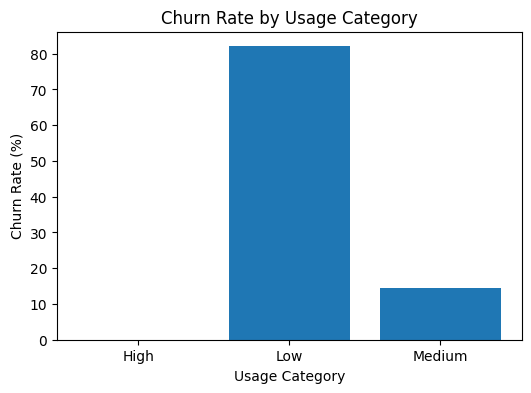

In [54]:
churn_usage = df.groupby('usage_category')['Churn Value'].mean() * 100

print(churn_usage)

plt.figure(figsize=(6,4))
plt.bar(churn_usage.index, churn_usage.values)
plt.title('Churn Rate by Usage Category')
plt.xlabel('Usage Category')
plt.ylabel('Churn Rate (%)')
plt.show()

Insight:
Low-usage customers have an 82% churn rate, while high-usage customers have 0% churn. This shows engagement is the strongest driver of retention.

Business implication:
Customers who don’t use the service do not see value and are highly likely to leave. Increasing engagement should be a core retention strategy.

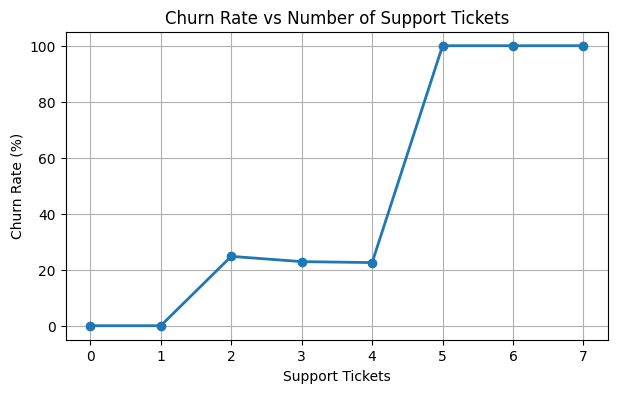

In [55]:
churn_support = df.groupby('support_tickets')['Churn Value'].mean() * 100

plt.figure(figsize=(7,4))
plt.plot(churn_support.index, churn_support.values, marker='o', linewidth=2)
plt.title('Churn Rate vs Number of Support Tickets')
plt.xlabel('Support Tickets')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


Insight:
Churn increases sharply with support issues. Customers with 5+ tickets churn at 100%, making high support friction a critical churn driver.

Business Implication:
Support-heavy customers must be flagged as high-risk immediately. Faster resolution and proactive outreach can prevent churn escalation.

satisfaction_score
1    100.000000
2    100.000000
3     27.964676
4      0.000000
5      0.000000
Name: Churn Value, dtype: float64


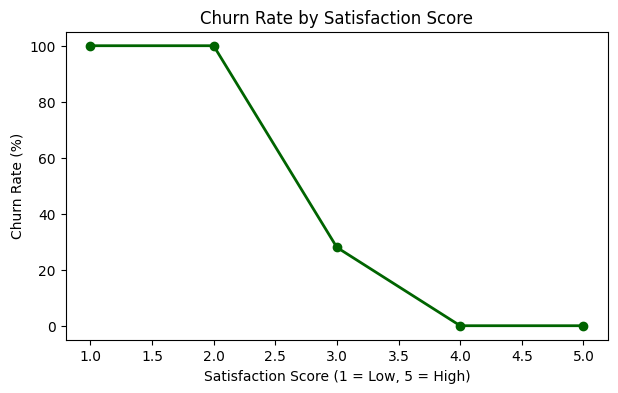

In [56]:
churn_satisfaction = df.groupby('satisfaction_score')['Churn Value'].mean() * 100

print(churn_satisfaction)

plt.figure(figsize=(7,4))
plt.plot(churn_satisfaction.index, churn_satisfaction.values, marker='o', linewidth=2, color='DarkGreen')
plt.title('Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score (1 = Low, 5 = High)')
plt.ylabel('Churn Rate (%)')
plt.grid(False)
plt.show()


Insight:
Churn is highest among low-satisfaction customers. Customers with satisfaction scores of 1 or 2 churn at 100%, while scores of 4 or 5 have 0% churn, making satisfaction a decisive churn predictor.

Business Implication:
Low-satisfaction customers must be identified and engaged immediately through feedback, recovery offers, and personalized support. Improving customer experience and sentiment directly reduces churn and strengthens retention.

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn Value, dtype: float64


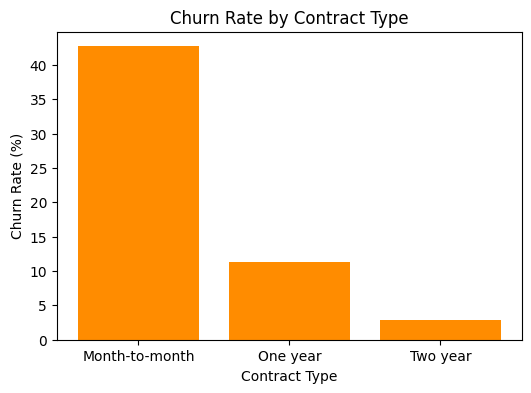

In [57]:
churn_contract = df.groupby('Contract')['Churn Value'].mean() * 100

print(churn_contract)

plt.figure(figsize=(6,4))
plt.bar(churn_contract.index, churn_contract.values, color='DarkOrange')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()


Insight
Churn is highest among month-to-month customers (42.7%), significantly lower for one-year contracts (11.3%), and lowest for two-year contracts (2.8%). Contract length is a major predictor of churn.

Business Implication
Month-to-month customers should be treated as a high-risk segment. Incentives such as discounts, loyalty benefits, or value-added offers can encourage customers to move toward longer-term contracts, reducing churn and stabilizing revenue.

tenure_group
0–12 Months     47.678161
13–24 Months    28.710938
25–48 Months    20.388959
49–72 Months     9.513176
Name: Churn Value, dtype: float64


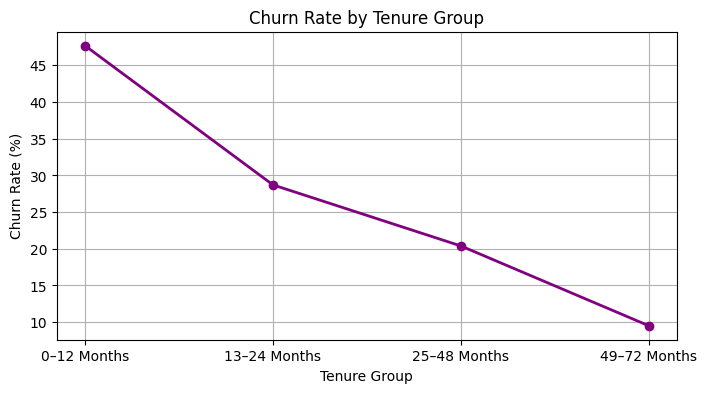

In [58]:
# Creating tenure buckets
df['tenure_group'] = pd.cut(
    df['Tenure Months'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–12 Months', '13–24 Months', '25–48 Months', '49–72 Months']
)

churn_tenure = df.groupby('tenure_group')['Churn Value'].mean() * 100

print(churn_tenure)

plt.figure(figsize=(8,4))
plt.plot(churn_tenure.index, churn_tenure.values, marker='o', linewidth=2, color='purple')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


Insight
Churn is highest among customers in their first 12 months (47.7 percent), decreases in the 13–24 month group (28.7 percent), continues dropping in the 25–48 month group (20.4 percent), and is lowest among customers with 49–72 months of tenure (9.5 percent). Early-stage customers are significantly more likely to churn compared to long-tenured customers.

Business Implication
The first year of a customer’s lifecycle is the most vulnerable period. Strengthening onboarding, early engagement, guided product adoption, and proactive support during the first 12 months can materially reduce churn and improve long-term retention and lifetime value.

charges_group
Low ($0–35)        10.893372
Medium ($36–70)    23.942029
High ($71–105)     37.814029
Name: Churn Value, dtype: float64


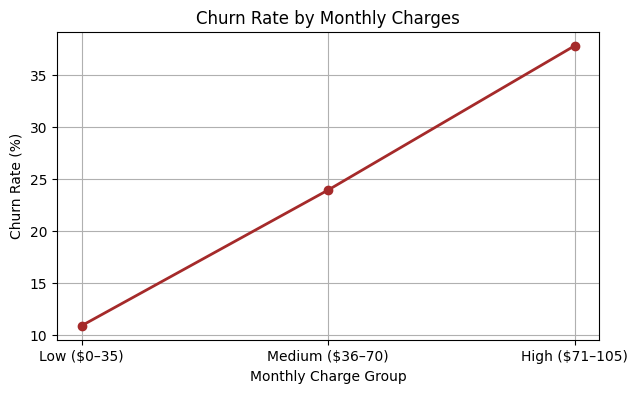

In [59]:
# Creating billing buckets
df['charges_group'] = pd.cut(
    df['Monthly Charges'],
    bins=[0, 35, 70, 105],
    labels=['Low ($0–35)', 'Medium ($36–70)', 'High ($71–105)']
)

churn_charges = df.groupby('charges_group')['Churn Value'].mean() * 100

print(churn_charges)

plt.figure(figsize=(7,4))
plt.plot(churn_charges.index, churn_charges.values, marker='o', linewidth=2, color='brown')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charge Group')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


Insight
Churn increases steadily with higher monthly charges. Customers paying $0–35 churn at 10.9 percent, those paying $36–70 churn at 23.9 percent, and those paying $71–105 churn at 37.8 percent. Higher billing levels are associated with a significantly higher likelihood of churn.

Business Implication
Customers in the highest billing segment should be monitored closely for price sensitivity and potential dissatisfaction. Retention strategies such as tiered pricing, loyalty benefits, bundled value, or personalized plan recommendations may help reduce churn among higher-paying customers.

Internet Service
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn Value, dtype: float64


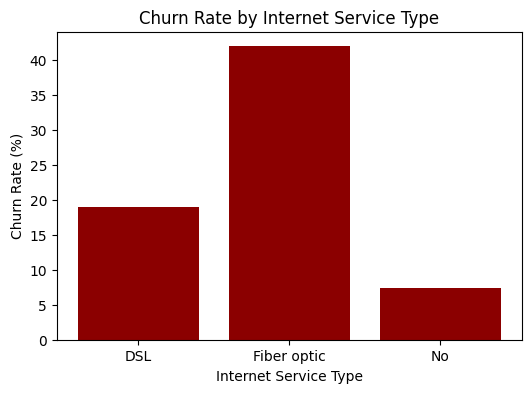

In [60]:
churn_service = df.groupby('Internet Service')['Churn Value'].mean() * 100

print(churn_service)

plt.figure(figsize=(6,4))
plt.bar(churn_service.index, churn_service.values, color='darkred')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.show()


Insight
Fiber optic customers show the highest churn rate at 41.9 percent, compared to 19.0 percent for DSL and 7.4 percent for customers without internet service. This indicates that customers on higher-performance services are leaving at a much faster rate, potentially due to higher expectations, higher costs, or service dissatisfaction.

Business Implication
Fiber optic customers should be treated as a priority retention segment. Improving service reliability, addressing performance or pricing concerns, and delivering targeted communication or incentives may help reduce churn within this group. Monitoring feedback and support patterns specifically for fiber optic users can provide additional clarity on root causes.

Key Findings

- Low usage customers churn the most
- High support issues strongly predict churn
- Low satisfaction drives churn
- Month-to-month contracts have the highest churn
- Early-tenure customers are most likely to leave
- Higher monthly bills correlate with higher churn
- Fiber customers churn more than DSL/No-internet

Business Recommendations
- Strengthen onboarding in first 12 months
- Improve support response for high-ticket customers
- Target satisfaction recovery campaigns
- Incentivize long-term contracts
- Reassess pricing for high-charge tiers